In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from src.data_loader import load_glass, load_seeds
from src.common import create_base_classifier, get_score
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from tqdm import tqdm


seeds_df, seeds_target = load_seeds()

glass_df, glass_target = load_glass()

wine_df, wine_target = load_wine(as_frame=True, return_X_y=True)


In [61]:
nums_of_classifiers = np.arange(1, 100)

results_df = pd.DataFrame(
    columns=[
        "n_estimators",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for num in tqdm(nums_of_classifiers):
    clf = AdaBoostClassifier(
        estimator=create_base_classifier(),
        n_estimators=num,
        random_state=42,
    )
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_df.loc[len(results_df)] = [
        num,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_df.head(10))

learning_rates = np.arange(0.1, 1.1, 0.1)

results_learning_rates_df = pd.DataFrame(
    columns=[
        "learning_rate",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for lr in tqdm(learning_rates):
    clf = AdaBoostClassifier(
        estimator=create_base_classifier(),
        random_state=42,
        learning_rate=lr,
    )
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_learning_rates_df.loc[len(results_learning_rates_df)] = [
        lr,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_learning_rates_df.head(10))

algorithms = ["SAMME", "SAMME.R"]

results_algorithms_df = pd.DataFrame(
    columns=[
        "algorithm",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for alg in tqdm(algorithms):
    clf = AdaBoostClassifier(
        estimator=create_base_classifier(),
        random_state=42,
        algorithm=alg,
    )
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_algorithms_df.loc[len(results_algorithms_df)] = [
        alg,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_algorithms_df.head(10))


100%|██████████| 99/99 [00:11<00:00,  8.77it/s]


,n_estimators,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,1.0,0.555556,0.0,0.334000,0.0,0.507349,0.0
1,2.0,0.558013,0.0,0.296124,0.0,0.861317,0.0
2,3.0,0.605420,0.0,0.483096,0.0,0.719213,0.0
3,4.0,0.558013,0.0,0.492241,0.0,0.835380,0.0
4,5.0,0.605420,0.0,0.261740,0.0,0.861317,0.0
5,6.0,0.558013,0.0,0.436030,0.0,0.861317,0.0
6,7.0,0.605420,0.0,0.261740,0.0,0.861317,0.0
7,8.0,0.558013,0.0,0.436030,0.0,0.861317,0.0
8,9.0,0.605420,0.0,0.456310,0.0,0.861317,0.0
9,10.0,0.558013,0.0,0.436030,0.0,0.861317,0.0


100%|██████████| 10/10 [00:01<00:00,  8.70it/s]


,learning_rate,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,0.1,0.809035,0.0,0.515615,0.0,0.881944,0.0
1,0.2,0.927742,0.0,0.470377,0.0,1.000000,0.0
2,0.3,0.927742,0.0,0.458802,0.0,0.971970,0.0
3,0.4,0.976160,0.0,0.601948,0.0,0.971970,0.0
4,0.5,0.902778,0.0,0.643280,0.0,0.943210,0.0
5,0.6,0.976160,0.0,0.580550,0.0,0.943210,0.0
6,0.7,0.928480,0.0,0.593403,0.0,0.971970,0.0
7,0.8,1.000000,0.0,0.517764,0.0,0.971970,0.0
8,0.9,1.000000,0.0,0.522488,0.0,0.971970,0.0
9,1.0,0.605420,0.0,0.475996,0.0,0.835380,0.0


100%|██████████| 2/2 [00:00<00:00,  8.61it/s]


,algorithm,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,SAMME,0.873056,0.0,0.500328,0.0,0.916529,0.0
1,SAMME.R,0.605420,0.0,0.475996,0.0,0.835380,0.0


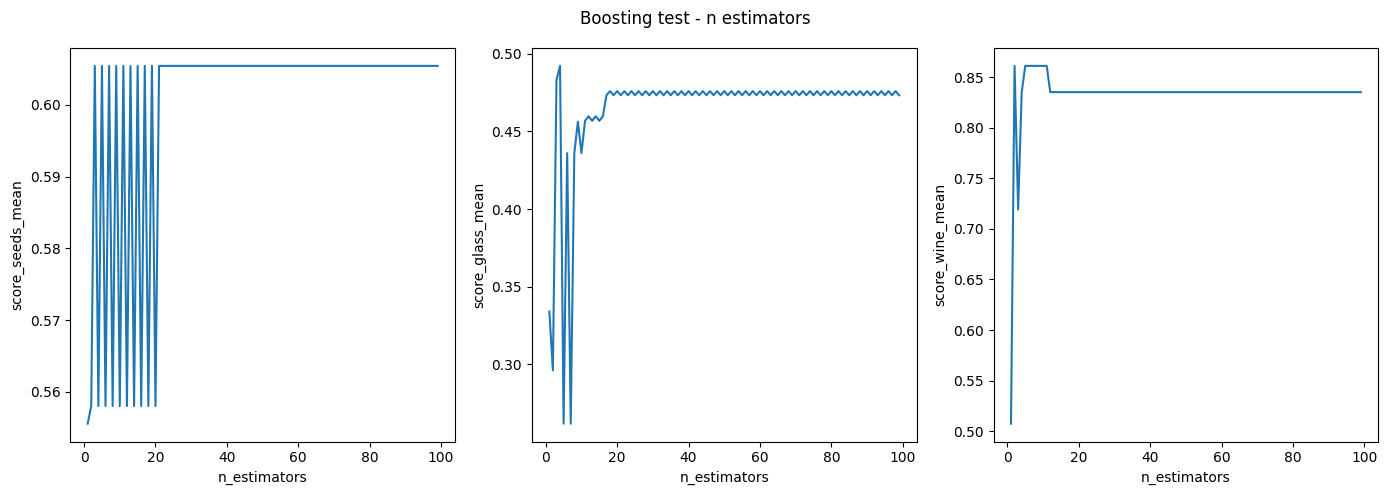

In [62]:
from src.common import plot_results

plot_results(
    results_df,
    "n_estimators",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Boosting test - n estimators",
)


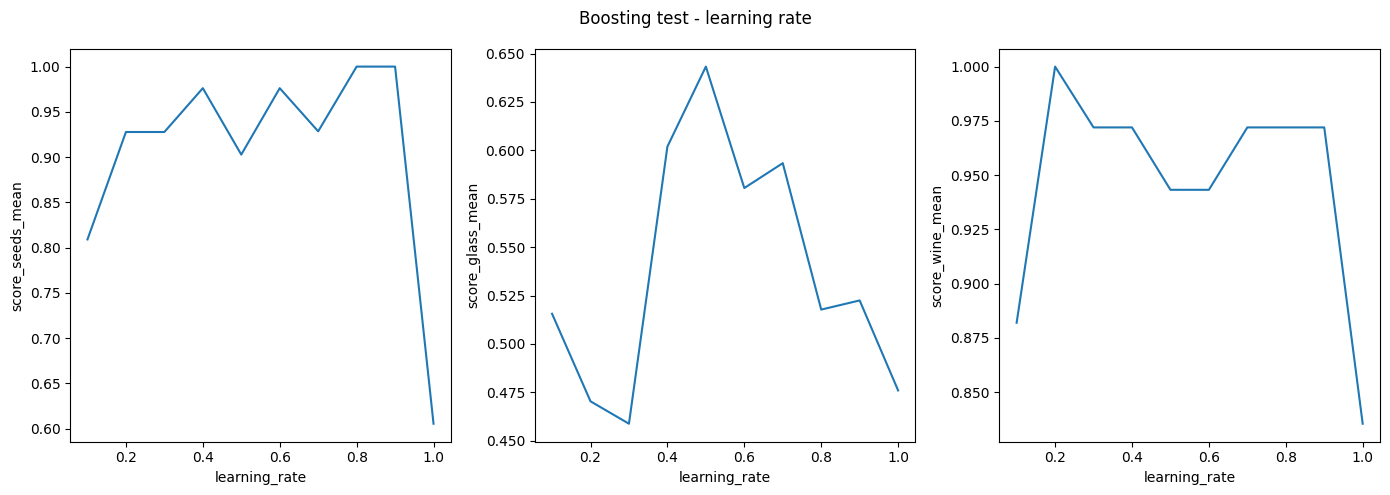

In [63]:
plot_results(
    results_learning_rates_df,
    "learning_rate",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Boosting test - learning rate",
)


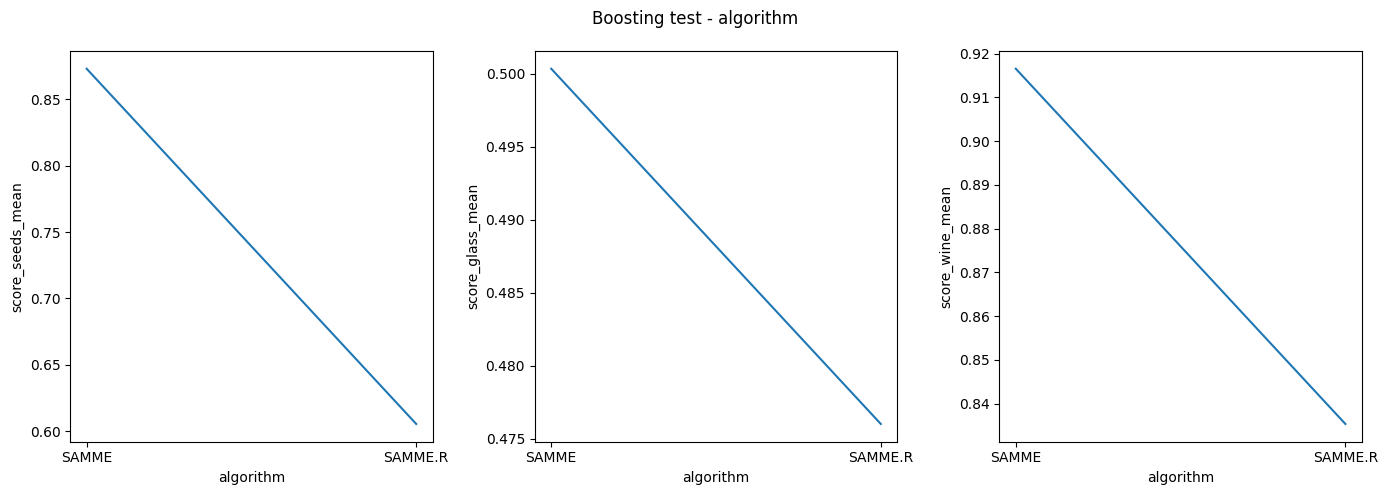

In [64]:
plot_results(
    results_algorithms_df,
    "algorithm",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Boosting test - algorithm",
)


In [65]:
clf_seeds = AdaBoostClassifier(
    estimator=create_base_classifier(),
    random_state=42,
    learning_rate=0.8,
    algorithm="SAMME",
    n_estimators=100,
)

clf_glass = AdaBoostClassifier(
    estimator=create_base_classifier(),
    random_state=42,
    learning_rate=0.5,
    algorithm="SAMME",
    n_estimators=4,
)

clf_wine = AdaBoostClassifier(
    estimator=create_base_classifier(),
    random_state=42,
    learning_rate=0.2,
    algorithm="SAMME",
    n_estimators=2,
)


score = get_score(
    seeds_df, seeds_target.to_numpy().ravel(), cross_val=True, clf=clf_seeds
)
print(f"Cross val score on seeds: mean = {score.mean()}, std = {score.std()}")

score = get_score(
    glass_df, glass_target.to_numpy().ravel(), cross_val=True, clf=clf_glass
)
print(f"Cross val score on glass: mean = {score.mean()}, std = {score.std()}")

score = get_score(wine_df, wine_target.to_numpy().ravel(), cross_val=True, clf=clf_wine)
print(f"Cross val score on wine: mean = {score.mean()}, std = {score.std()}")


Cross val score on seeds: mean = 0.8857142857142858, std = 0.046168379594441214
Cross val score on glass: mean = 0.4716500553709856, std = 0.046905990430373586
Cross val score on wine: mean = 0.6631746031746031, std = 0.05461009553776194
